In [167]:
import pandas as pd

In [168]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [169]:
file = r'crypto_adj_close.csv'
data = pd.read_csv(file, index_col="Date", parse_dates=True)

In [170]:
data.columns

Index(['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'XRP-USD',
       'ADA-USD', 'SOL-USD', 'DOGE-USD', 'TRX-USD', 'TON-USD', 'MATIC-USD',
       'DOT-USD', 'LTC-USD', 'AVAX-USD', 'WBTC-USD', 'DAI-USD', 'WTRX-USD',
       'STETH-USD', 'LINK-USD', 'LEO-USD', 'XLM-USD', 'WSTETH-USD', 'HBAR-USD',
       'USDS33039-USD', 'SHIB-USD', 'SUI20947-USD', 'BCH-USD'],
      dtype='object')

In [171]:
# remove the -USD from the column names
data.columns = [col.split('-')[0] for col in data.columns]

In [173]:
# drop the USDS33039-USD and SUI20947-USD, because they are to new
data = data.drop(columns=['USDS33039', 'SUI20947', 'USDT' , 'USDC', 'WBTC', 'WTRX', 'STETH'])

# drop the NaN values
data = data.dropna()

In [174]:
mu = expected_returns.mean_historical_return(data)
s = risk_models.sample_cov(data)

# **MAX SHARPE**

In [175]:
ef = EfficientFrontier(mu, s)

In [176]:
max_sharpe = ef.max_sharpe()

In [177]:
cleaned_weights_max_sharpe = ef.clean_weights()

In [178]:
for i in cleaned_weights_max_sharpe:
    if cleaned_weights_max_sharpe[i] > 0:
        print(i, cleaned_weights_max_sharpe[i])

XRP 0.06118
TRX 0.22216
LEO 0.71666


In [179]:
ef.portfolio_performance(verbose=True)

Expected annual return: 25.1%
Annual volatility: 39.2%
Sharpe Ratio: 0.64


(np.float64(0.25074189216186854),
 np.float64(0.39174243961980504),
 np.float64(0.6400682356632569))

# **MAX SHARPE CFDS**

In [180]:
efshort = EfficientFrontier(mu, s, weight_bounds=(-1, 1))
ef.deepcopy()

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import plotting

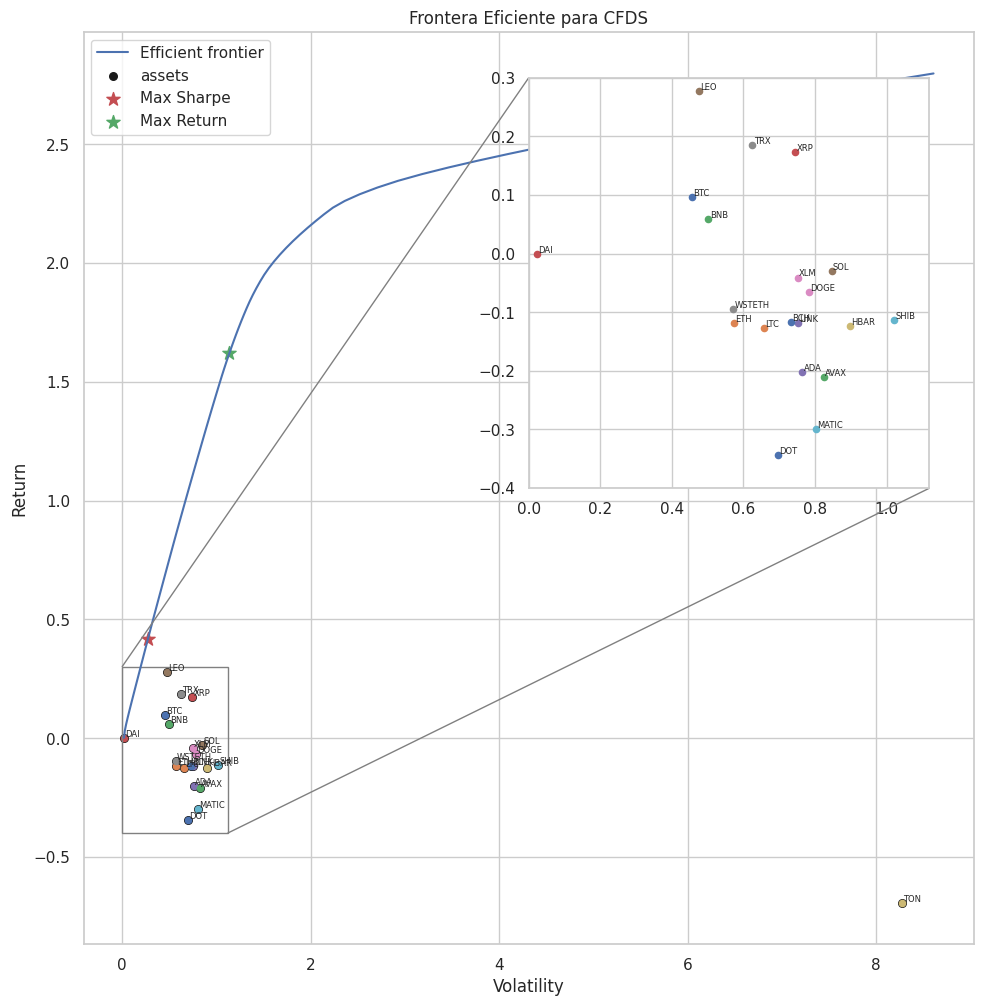

In [205]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

ef = EfficientFrontier(mu, s, weight_bounds=(-1, 1))

fig, ax = plt.subplots(figsize=(10, 10))
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True, color='red')  # Change the color here

# find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# find the maximum return portfolio
ef_max_return = EfficientFrontier(mu, s, weight_bounds=(-1, 1)) # create a new instance of the efficient frontier
ef_max_return.max_quadratic_utility()
ret_max, std_max, _ = ef_max_return.portfolio_performance()
ax.scatter(std_max, ret_max, marker="*", s=100, c="g", label="Max Return")

# Calculate individual asset volatilities from the covariance matrix
asset_volatilities = np.sqrt(np.diag(s))
asset_returns = np.array(mu)

# Annotate each asset with its volatility (x) and expected return (y)
for i, txt in enumerate(data.columns):
    ax.annotate(txt, (asset_volatilities[i], asset_returns[i]), xytext=(1, 1), textcoords='offset points', fontsize=6)
    ax.scatter(asset_volatilities[i], asset_returns[i], marker='o', s=20)

# Create inset of the zoomed region
x_zoom = (0, 1.12)
y_zoom = (-.4, .3)
axins = ax.inset_axes([0.5, 0.5, 0.45, 0.45])
axins.set_xlim(x_zoom)
axins.set_ylim(y_zoom)

# Plot the same data on the inset
for i, txt in enumerate(data.columns):
    axins.annotate(txt, (asset_volatilities[i], asset_returns[i]), xytext=(1, 1), textcoords='offset points', fontsize=6)
    axins.scatter(asset_volatilities[i], asset_returns[i], marker='o', s=20)

# Mark the zoomed area on the main plot
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# Add legend
ax.legend()

plt.tight_layout()

# add title
plt.title("Frontera Eficiente para CFDS")

plt.savefig("efficient_frontier.svg")

plt.show()


In [183]:
msshort = efshort.max_sharpe()

In [184]:
cleaned_weights_max_return = efshort.clean_weights()

In [185]:
for i in cleaned_weights_max_return:
    if cleaned_weights_max_return[i] != 0:
         print(f"{i}: {cleaned_weights_max_return[i] * 10:.2f}%")

BTC: 5.38%
ETH: -10.00%
BNB: 2.52%
XRP: 2.13%
ADA: -1.27%
SOL: 0.56%
DOGE: -0.02%
TRX: 1.07%
TON: -0.04%
MATIC: -1.40%
DOT: -2.88%
LTC: -0.39%
AVAX: -0.77%
DAI: 5.37%
LINK: 1.18%
LEO: 2.17%
XLM: -0.20%
WSTETH: 7.07%
HBAR: -0.09%
SHIB: 0.05%
BCH: -0.44%


In [186]:
efshort.portfolio_performance(verbose=True)

Expected annual return: 41.6%
Annual volatility: 27.5%
Sharpe Ratio: 1.52


(np.float64(0.41601877815671895),
 np.float64(0.27455893224174643),
 np.float64(1.5152258014698954))

In [187]:
expected_returns.mean_historical_return(data)

BTC       0.095883
ETH      -0.118016
BNB       0.059407
XRP       0.172535
ADA      -0.202117
SOL      -0.030277
DOGE     -0.065310
TRX       0.185221
TON      -0.692985
MATIC    -0.299516
DOT      -0.344286
LTC      -0.126201
AVAX     -0.210539
DAI      -0.000038
LINK     -0.118165
LEO       0.277730
XLM      -0.040903
WSTETH   -0.094481
HBAR     -0.123490
SHIB     -0.112827
BCH      -0.116563
dtype: float64

In [188]:
expected_returns.ema_historical_return(data)

BTC       4.488600e-01
ETH      -1.704504e-01
BNB       2.693358e-01
XRP       2.551565e+00
ADA       1.142688e+00
SOL       4.206588e-01
DOGE      4.990333e-01
TRX       9.456012e-01
TON       1.696928e+14
MATIC    -4.540492e-01
DOT      -8.832870e-02
LTC       3.469950e-01
AVAX     -6.749856e-02
DAI       1.896786e-04
LINK      3.841581e-01
LEO       6.359917e-01
XLM       1.483129e+00
WSTETH   -1.544893e-01
HBAR      2.116090e+00
SHIB      1.619381e-01
BCH       2.543724e-01
Name: 2025-03-14 00:00:00+00:00, dtype: float64

In [189]:
expected_returns.capm_return(data)

BTC       0.220606
ETH       0.286708
BNB       0.222844
XRP       0.303145
ADA       0.349170
SOL       0.389385
DOGE      0.328563
TRX       0.173842
TON       3.748755
MATIC     0.379204
DOT       0.330935
LTC       0.298026
AVAX      0.380123
DAI       0.002396
LINK      0.360325
LEO       0.059570
XLM       0.304308
WSTETH    0.282805
HBAR      0.357709
SHIB      0.332719
BCH       0.302525
Name: mkt, dtype: float64

In [190]:
returns = data.pct_change()
returns.dropna(inplace=True)
returns

,BTC,ETH,BNB,XRP,ADA,SOL,DOGE,TRX,TON,MATIC,...,LTC,AVAX,DAI,LINK,LEO,XLM,WSTETH,HBAR,SHIB,BCH
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-08 00:00:00+00:00,0.003008,-0.006749,-0.044807,-0.004808,-0.017488,0.030257,0.003820,0.022573,0.065562,0.052894,...,-0.015659,-0.015745,-0.000322,-0.016139,-0.040948,-0.024106,-0.011616,-0.011365,0.173913,-0.026765
2021-10-09 00:00:00+00:00,0.018536,0.003355,0.005840,0.091294,0.013159,-0.013359,0.011257,0.053241,0.048309,0.005292,...,0.020948,0.000761,0.000956,0.038488,0.020838,0.050793,0.004265,-0.007361,0.000000,0.031406
2021-10-10 00:00:00+00:00,-0.003577,-0.041912,-0.039094,-0.018512,-0.030619,-0.055967,-0.068091,-0.049791,-0.066657,-0.076206,...,-0.024157,-0.065592,-0.000567,-0.064490,-0.024395,-0.057676,-0.030452,-0.073877,-0.037037,-0.045308
2021-10-11 00:00:00+00:00,0.049537,0.034882,0.020705,-0.000496,-0.010843,-0.021551,0.007389,-0.005995,-0.054655,-0.003566,...,0.023429,-0.022776,0.000204,-0.015210,-0.009459,0.036206,0.008961,0.000774,0.192308,0.025856
2021-10-12 00:00:00+00:00,-0.025115,-0.014887,0.073554,-0.031663,-0.024938,0.054391,-0.022725,-0.017013,-0.031440,-0.015963,...,-0.036942,-0.017117,-0.000404,-0.025146,0.022236,-0.033130,-0.008392,0.018919,-0.064516,-0.023864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-10 00:00:00+00:00,-0.025670,-0.076585,-0.040496,-0.054475,-0.066031,-0.064410,-0.081900,-0.010444,-0.858370,-0.060629,...,-0.073176,-0.093102,0.000149,-0.078432,0.001391,-0.077883,-0.067245,-0.049350,0.000000,-0.071616
2025-03-11 00:00:00+00:00,0.055139,0.031536,0.036369,0.073637,0.074324,0.058941,0.065598,-0.022049,0.307049,0.040876,...,0.031690,0.072992,-0.000042,0.032044,0.013864,0.052509,0.026613,0.033637,0.000000,0.023659
2025-03-12 00:00:00+00:00,0.010380,-0.005658,0.033402,0.034076,0.017793,0.010532,0.050041,-0.006376,-0.159987,0.004242,...,0.012808,0.081515,0.000005,0.029198,-0.017567,0.017896,-0.012436,0.026317,0.000000,0.042611


## PUEDO HACER UN PLOT DE LOS QUE SON MUCHOS DONDE SE VEN LAS DISTRIBUCIONES DE LOS RETURNS

# SE PUEDE HACER UNA ANIMACION QUE SEA POR MES DE MUCHOS PLOTS

In [191]:
from pypfopt import risk_models

In [192]:
risk_models.risk_matrix(data)

,BTC,ETH,BNB,XRP,ADA,SOL,DOGE,TRX,TON,MATIC,...,LTC,AVAX,DAI,LINK,LEO,XLM,WSTETH,HBAR,SHIB,BCH
BTC,0.206916,0.219881,0.161928,0.190045,0.236379,0.275730,0.243831,0.112926,-0.023674,0.249304,...,0.200088,0.261652,0.001586,0.229890,0.041470,0.184504,0.215209,0.218771,0.220507,0.218676
ETH,0.219881,0.328812,0.209684,0.247693,0.305139,0.349751,0.299703,0.139029,-0.041196,0.349620,...,0.264372,0.339813,0.002032,0.310373,0.048588,0.240472,0.324251,0.282243,0.270107,0.266809
BNB,0.161928,0.209684,0.251570,0.182408,0.226107,0.270829,0.227843,0.142203,-0.016151,0.276879,...,0.201332,0.263867,0.002026,0.231355,0.026126,0.187956,0.205168,0.224211,0.208017,0.208004
XRP,0.190045,0.247693,0.182408,0.554572,0.389356,0.341884,0.300073,0.153570,-0.233505,0.351236,...,0.287003,0.347692,0.002058,0.322019,0.052394,0.444121,0.245092,0.346826,0.264396,0.247919
ADA,0.236379,0.305139,0.226107,0.389356,0.583853,0.428632,0.373405,0.181986,-0.252981,0.410914,...,0.315840,0.428032,0.002569,0.396141,0.044061,0.374858,0.301300,0.368650,0.339590,0.309344
SOL,0.275730,0.349751,0.270829,0.341884,0.428632,0.716391,0.384352,0.199811,-0.027075,0.456315,...,0.326111,0.509693,0.002287,0.412644,0.058669,0.327460,0.343669,0.390262,0.354838,0.331630
DOGE,0.243831,0.299703,0.227843,0.300073,0.373405,0.384352,0.613241,0.155897,-0.255829,0.363485,...,0.300038,0.390399,0.002066,0.334640,0.044017,0.294289,0.294362,0.319665,0.437465,0.322074
TRX,0.112926,0.139029,0.142203,0.153570,0.181986,0.199811,0.155897,0.390114,-0.128015,0.205170,...,0.156096,0.180746,0.001512,0.166050,0.024136,0.162292,0.139268,0.190808,0.153676,0.162212
TON,-0.023674,-0.041196,-0.016151,-0.233505,-0.252981,-0.027075,-0.255829,-0.128015,68.458215,-0.142606,...,-0.088969,-0.226033,0.000986,0.085152,0.049233,-0.280624,-0.036806,-0.027295,-0.330524,-0.100704
MATIC,0.249304,0.349620,0.276879,0.351236,0.410914,0.456315,0.363485,0.205170,-0.142606,0.642377,...,0.343595,0.462513,0.002978,0.427634,0.042047,0.365699,0.345339,0.404237,0.372027,0.336918


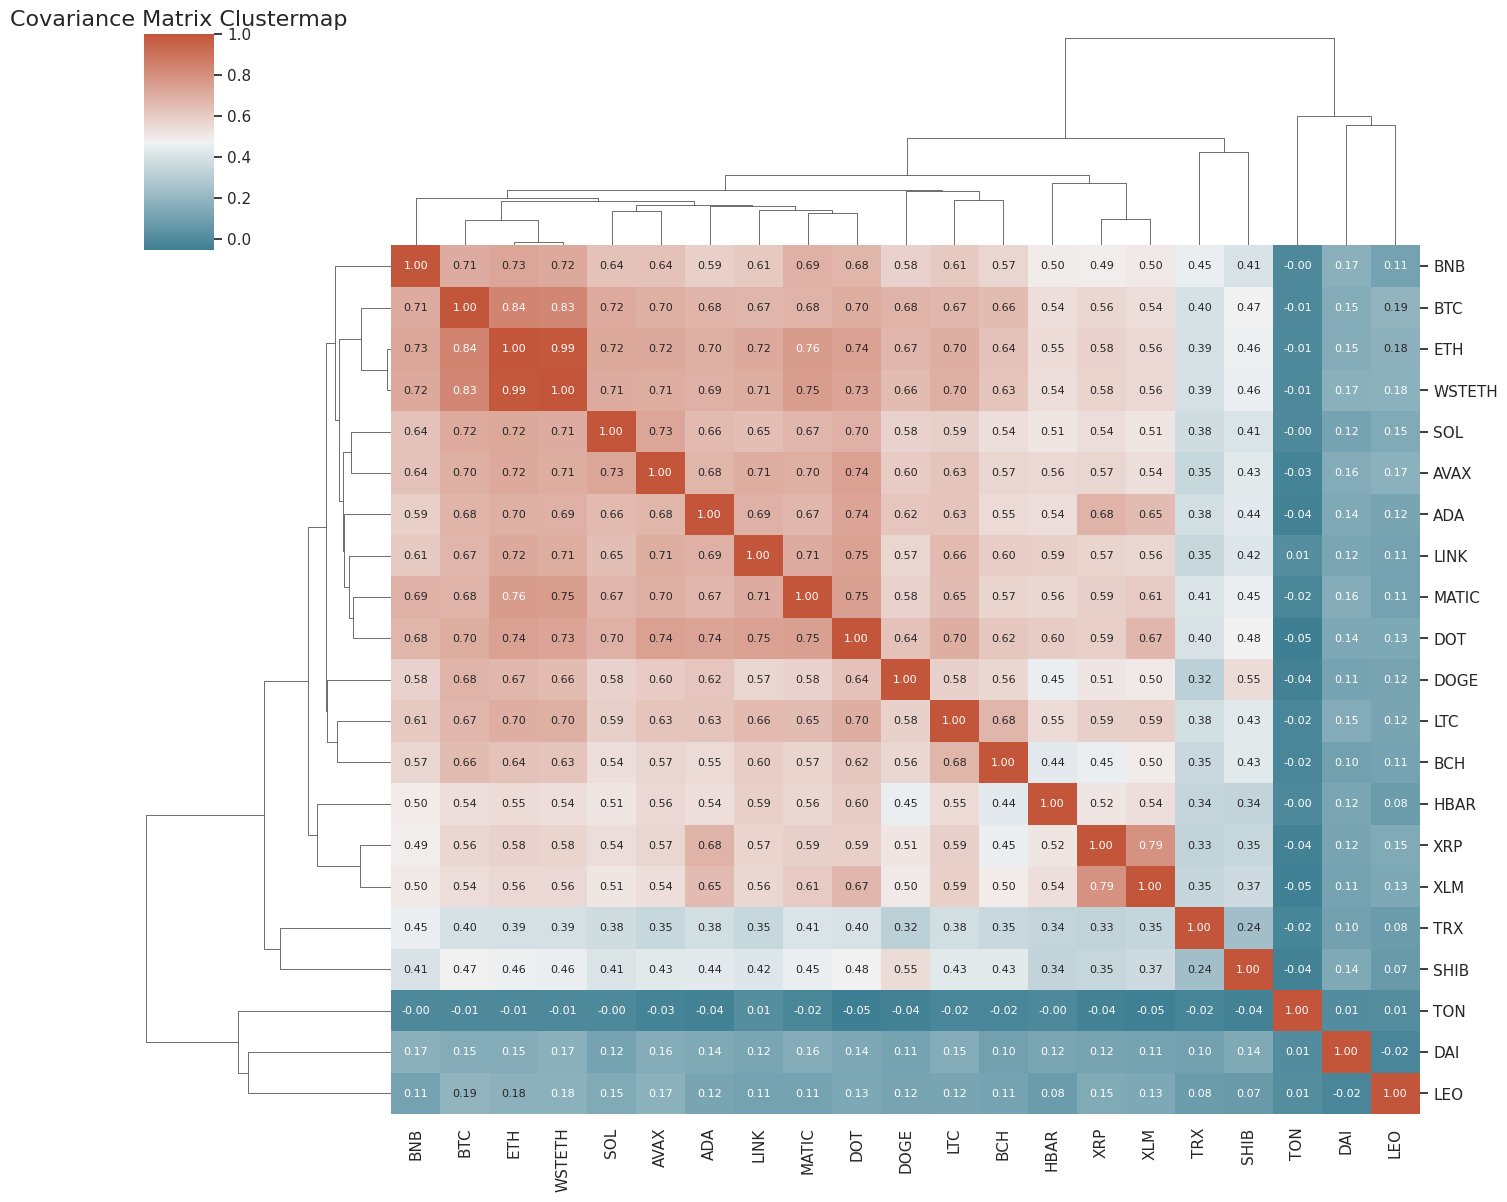

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette
sns.set(style="whitegrid")
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create the clustermap with smaller annotation font size
g = sns.clustermap(risk_models.cov_to_corr(s), annot=True, cmap=cmap, fmt='.2f', figsize=(14, 12), annot_kws={"size": 8})

# Customize the plot
plt.title('Covariance Matrix Clustermap', fontsize=16)

plt.show()


# **MAX RETURN CFDS**

In [194]:
mrs = EfficientFrontier(mu, s, weight_bounds=(-1, 1))

In [195]:
mrsw = mrs.max_quadratic_utility()

In [196]:
mrscw = mrs.clean_weights() # Max Returs Short Clean Weights

In [197]:
for i in mrscw:
    if mrscw[i] != 0:
         print(f"{i}: {mrscw[i] * 10:.2f}%")

BTC: 10.00%
ETH: -10.00%
BNB: 10.00%
XRP: 10.00%
ADA: -6.74%
SOL: 4.05%
DOGE: 0.94%
TRX: 6.94%
TON: -0.17%
MATIC: -8.76%
DOT: -10.00%
LTC: -2.22%
AVAX: -4.16%
DAI: -7.31%
LINK: 4.86%
LEO: 10.00%
XLM: -0.74%
WSTETH: 4.77%
HBAR: -0.47%
SHIB: 0.37%
BCH: -1.37%


In [198]:
mrs.portfolio_performance(verbose=True)

Expected annual return: 162.2%
Annual volatility: 114.0%
Sharpe Ratio: 1.42


(np.float64(1.6217999287839142),
 np.float64(1.1401352663358302),
 np.float64(1.4224627346157437))